In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!nvidia-smi

Tue Oct 24 17:54:45 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)
%pip install ultralytics
import ultralytics
ultralytics.checks()

from IPython import display
display.clear_output()


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image


In [ ]:
# for yolov8
# this is the YAML file
%cat /content/drive/MyDrive/Flying_Eagle.v2i.yolov8/data.yaml

train: /content/drive/MyDrive/Flying_Eagle.v2i.yolov8/train/images
val: /content/drive/MyDrive/Flying_Eagle.v2i.yolov8/valid/images
test: /content/drive/MyDrive/Flying_Eagle.v2i.yolov8/test/images

nc: 1
names: ['Eagle']

roboflow:
  workspace: mlassignment-o2baw
  project: flying-eagle
  version: 2
  license: CC BY 4.0
  url: https://universe.roboflow.com/mlassignment-o2baw/flying-eagle/dataset/2

In [ ]:
#for yolov8
# define number of classes based on YAML
import yaml
with open("/content/drive/MyDrive/Flying_Eagle.v2i.yolov8/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [ ]:
# Start tensorboard
# Launch after you have started training
#@title Select YOLOv8 🚀 logger {run: 'auto'}
logger = 'Comet' #@param ['Comet', 'TensorBoard']

if logger == 'Comet':
  %pip install -q comet_ml
  import comet_ml; comet_ml.init()
elif logger == 'TensorBoard':
  %load_ext tensorboard
  %tensorboard --logdir .


Please paste your Comet API key from https://www.comet.com/api/my/settings/
(api key may not show as you type)
Comet API key: ··········


COMET ERROR: Invalid Comet API key for https://www.comet.com/clientlib/
Please see https://www.comet.com/docs/command-line/#comet-check for more information.
Use: comet_ml.init() to try again


In [ ]:
%cd /content/drive/MyDrive/Flying_Eagle.v2i.yolov8/

!yolo task=detect mode=train model=yolov8s.pt data=/content/drive/MyDrive/Flying_Eagle.v2i.yolov8/data.yaml epochs=100 imgsz=800 plots=True

/content/drive/MyDrive/Flying_Eagle.v2i.yolov8
100% 21.5M/21.5M [00:00<00:00, 157MB/s]
Ultralytics YOLOv8.0.200 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Flying_Eagle.v2i.yolov8/data.yaml, epochs=100, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, 

In [ ]:
!ls /content/drive/MyDrive/Flying_Eagle.v2i.yolov8/train

images	labels	labels.cache


In [ ]:
%cd /content/drive/MyDrive/Flying_Eagle.v2i.yolov8/

!yolo task=detect mode=val model=/content/drive/MyDrive/Flying_Eagle.v2i.yolov8/runs/detect/train/weights/best.pt data=/content/drive/MyDrive/Flying_Eagle.v2i.yolov8/data.yaml

/content/drive/MyDrive/Flying_Eagle.v2i.yolov8
Ultralytics YOLOv8.0.200 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/Flying_Eagle.v2i.yolov8/valid/labels.cache... 166 images, 0 backgrounds, 0 corrupt: 100% 166/166 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 11/11 [00:05<00:00,  1.85it/s]
                   all        166        179      0.914      0.948      0.965      0.846
Speed: 4.3ms preprocess, 15.3ms inference, 0.0ms loss, 3.5ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
%cd /content/drive/MyDrive/Flying_Eagle.v2i.yolov8/
!yolo task=detect mode=predict model=/content/drive/MyDrive/Flying_Eagle.v2i.yolov8/runs/detect/train/weights/best.pt conf=0.45 source=/content/drive/MyDrive/Flying_Eagle.v2i.yolov8/test/images save=True

/content/drive/MyDrive/Flying_Eagle.v2i.yolov8
Ultralytics YOLOv8.0.200 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/115 /content/drive/MyDrive/Flying_Eagle.v2i.yolov8/test/images/8832fbd51f4ad482_jpg.rf.c050c6b9cb0bc0c5af84c7ec9bbc032d.jpg: 800x800 1 Eagle, 24.6ms
image 2/115 /content/drive/MyDrive/Flying_Eagle.v2i.yolov8/test/images/8877d93c0acf779e_jpg.rf.2b24bb22f82d7cbd5a262a6a35e19fff.jpg: 800x800 1 Eagle, 24.7ms
image 3/115 /content/drive/MyDrive/Flying_Eagle.v2i.yolov8/test/images/8a34167013df16ea_jpg.rf.4f5668cabffe04159046a3fba80978cc.jpg: 800x800 1 Eagle, 24.7ms
image 4/115 /content/drive/MyDrive/Flying_Eagle.v2i.yolov8/test/images/8d6c93fe7d0642f4_jpg.rf.d5d9e90a42649b4a3cff4858b3730653.jpg: 800x800 1 Eagle, 24.5ms
image 5/115 /content/drive/MyDrive/Flying_Eagle.v2i.yolov8/test/images/8db5c0e6d0eebcd9_jpg.rf.e709ab26aa054880d31cfca3315e3162.jpg: 800x800 1 Eagle, 24.6m

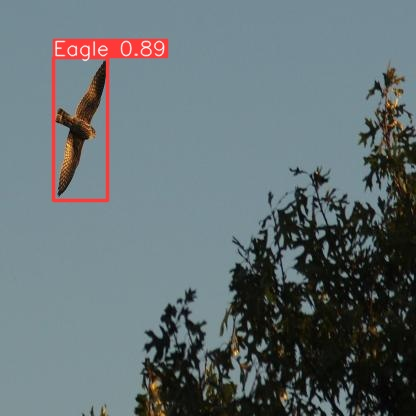

In [ ]:

import glob
from IPython.display import Image, display

for image_path in glob.glob('/content/drive/MyDrive/Flying_Eagle.v2i.yolov8/runs/detect/predict/9d793daf45bb25be_jpg.rf.d10ea1c7de01c8f2ebec279e72b0ca61.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

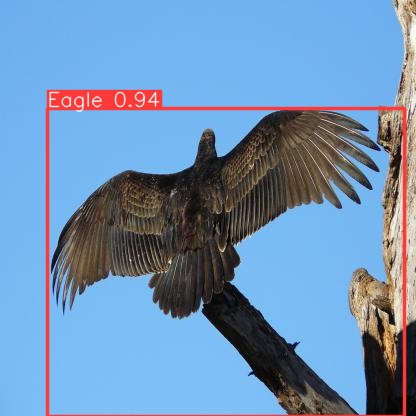

In [ ]:

import glob
from IPython.display import Image, display

for image_path in glob.glob('/content/drive/MyDrive/Flying_Eagle.v2i.yolov8/runs/detect/predict/9f4ee0e11481d2d8_jpg.rf.39f23ae4deb0371558ab34acea5282e4.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

# !pip install bytetracker

In [ ]:
# from ultralytics import YOLO

In [ ]:
model = YOLO('/content/drive/MyDrive/Flying_Eagle.v2i.yolov8/runs/detect/train/weights/best.pt')

In [ ]:
results = model.track(source="https://youtube.com/shorts/EohBaUH0Ycw?si=vXe8TlkTgjSBei6M", show=True, tracker="/content/drive/MyDrive/Flying_Eagle.v2i.yolov8/bytetrack.yaml",conf=0.3, iou=0.5, )

requirements: Ultralytics requirement ['lapx>=0.5.2'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 11.3 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 6.6s, installed 1 package: ['lapx>=0.5.2']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


requirements: Ultralytics requirement ['yt-dlp'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 213.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 61.4 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 10.1s, installed 1 package: ['yt-dlp']
requirements: ⚠️ Restart runtime or

In [ ]:
!yolo track model=/content/drive/MyDrive/Flying_Eagle.v2i.yolov8/runs/detect/train/weights/best.pt source="https://youtube.com/shorts/EohBaUH0Ycw?si=vXe8TlkTgjSBei6M" tracker=/content/drive/MyDrive/Flying_Eagle.v2i.yolov8/bytetrack.yaml

Ultralytics YOLOv8.0.200 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

1/1: https://youtube.com/shorts/EohBaUH0Ycw?si=vXe8TlkTgjSBei6M... Success ✅ (169 frames of shape 2160x3840 at 23.98 FPS)

0: 800x480 1 Eagle, 2075.8ms
0: 800x480 1 Eagle, 27.9ms
0: 800x480 1 Eagle, 32.1ms
0: 800x480 1 Eagle, 30.2ms
0: 800x480 1 Eagle, 20.5ms
0: 800x480 1 Eagle, 59.1ms
0: 800x480 1 Eagle, 39.8ms
0: 800x480 1 Eagle, 29.5ms
0: 800x480 1 Eagle, 25.9ms
0: 800x480 1 Eagle, 20.7ms
0: 800x480 1 Eagle, 16.7ms
0: 800x480 1 Eagle, 20.0ms
0: 800x480 1 Eagle, 15.7ms
0: 800x480 1 Eagle, 27.7ms
0: 800x480 1 Eagle, 15.8ms
0: 800x480 1 Eagle, 42.2ms
0: 800x480 1 Eagle, 32.3ms
0: 800x480 1 Eagle, 28.1ms
0: 800x480 1 Eagle, 32.0ms
0: 800x480 1 Eagle, 36.4ms
0: 800x480 1 Eagle, 38.4ms
0: 800x480 1 Eagle, 16.7ms
0: 800x480 1 Eagle, 21.5ms
0: 800x480 1 Eagle, 23.4ms
0: 800x480 1 Eagle, 25.4ms
0: 800x480 1 Eagle, 26.2ms
0: 

In [ ]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Eagle'}
 orig_img: array([[[ 50, 103,  74],
         [ 50, 103,  74],
         [ 50, 103,  74],
         ...,
         [ 44,  93,  63],
         [ 44,  93,  63],
         [ 44,  93,  63]],
 
        [[ 50, 103,  74],
         [ 50, 103,  74],
         [ 50, 103,  74],
         ...,
         [ 44,  93,  63],
         [ 44,  93,  63],
         [ 44,  93,  63]],
 
        [[ 51, 104,  75],
         [ 51, 104,  75],
         [ 51, 104,  75],
         ...,
         [ 44,  93,  63],
         [ 44,  93,  63],
         [ 44,  93,  63]],
 
        ...,
 
        [[184, 190, 185],
         [184, 190, 185],
         [184, 190, 185],
         ...,
         [157, 160, 158],
         [157, 160, 158],
         [157, 160, 158]],
 
        [[184, 190, 185],
         [184, 190, 185],
         [184, 190, 185],
         ...,
         [158, 161, 159],
    